## Упражнения пункт 2.5 (стр.86)

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

## Задание 1

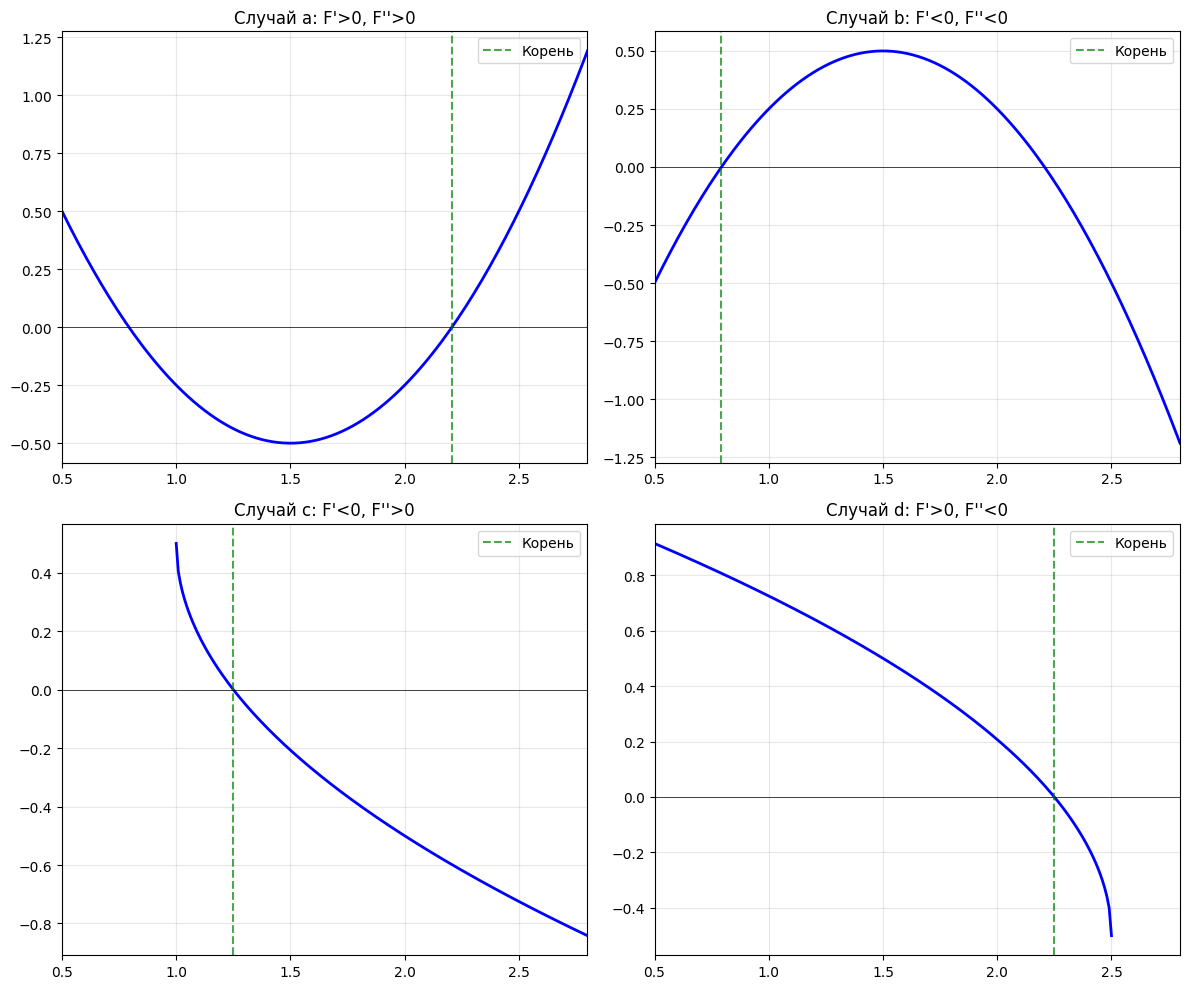

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 4 разных случая
funcs = [
    lambda x: (x-1.5)**2 - 0.5,           
    lambda x: -(x-1.5)**2 + 0.5,           
    lambda x: -np.sqrt(x-1) + 0.5,         
    lambda x: np.sqrt(2.5-x) - 0.5         
]

titles = ["F'>0, F''>0", "F'<0, F''<0", "F'<0, F''>0", "F'>0, F''<0"]
roots = [1.5+np.sqrt(0.5), 1.5-np.sqrt(0.5), 1.25, 2.25]
x_ranges = [(0.5, 2.8), (0.5, 2.8), (1.0, 2.8), (0.5, 2.5)]  # Индивидуальные диапазоны

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (f, title, root, x_range) in enumerate(zip(funcs, titles, roots, x_ranges)):
    x = np.linspace(x_range[0], x_range[1], 200)
    y = f(x)
    
    axes[i].plot(x, y, 'b-', linewidth=2)
    axes[i].axhline(0, color='black', linewidth=0.5)
    axes[i].axvline(root, color='g', linestyle='--', alpha=0.7, label='Корень')
    axes[i].set_title(f'Случай {chr(97+i)}: {title}')
    axes[i].set_xlim(0.5, 2.8)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.show()

## Задание 2

In [35]:
def combined_method_simple(a, b, eps=1e-6):
    """
    Комбинированный метод хорд и касательных
    для уравнения x^3 + 3x^2 - 24x + 1 = 0 на отрезке [0, 1]
    """
    # функция и производные
    F = lambda x: x**3 + 3*x**2 - 24*x + 1
    Fp = lambda x: 3*x**2 + 6*x - 24
    Fpp = lambda x: 6*x + 6
    
    # проверка условия сходимости
    print(f"f({a}) = {F(a):.6f}, f({b}) = {F(b):.6f}")
    print(f"f'({a}) = {Fp(a):.2f}, f'({b}) = {Fp(b):.2f}")
    print(f"f''({a}) = {Fpp(a):.2f}, f''({b}) = {Fpp(b):.2f}")
    
    # выбор неподвижного конца
    if F(a) * Fpp(a) > 0:
        c, x_chord, x_tan = a, b, a
        print(f"Касательная из левого конца c={c}")
    else:
        c, x_chord, x_tan = b, a, b
        print(f"Касательная из правого конца c={c}")
    
    print(f"Начальные: c={c}, хорды={x_chord:.6f}, касательные={x_tan:.6f}")
    print("-"*60)
    print(f"{'i':^3} | {'x_chord':^12} | {'x_tan':^12} | {'разница':^10} | {'f(x)':^10}")
    print("-"*60)
    
    for i in range(1, 20):
        # метод хорд
        x_chord_new = (c * F(x_chord) - x_chord * F(c)) / (F(x_chord) - F(c))
        
        # метод касательных
        x_tan_new = x_tan - F(x_tan) / Fp(x_tan)
        
        diff = abs(x_chord_new - x_tan_new)
        f_mid = F((x_chord_new + x_tan_new)/2)
        
        print(f"{i:^3d} | {x_chord_new:^12.6f} | {x_tan_new:^12.6f} | {diff:^10.2e} | {f_mid:^10.2e}")
        
        if diff < eps:
            root = (x_chord_new + x_tan_new) / 2
            print("-"*60)
            print(f"\nРЕЗУЛЬТАТ:")
            print(f"Корень: x = {root:.8f} ± {eps/2:.0e}")
            print(f"Проверка: F({root:.8f}) = {F(root):.2e}")
            return root
        
        x_chord, x_tan = x_chord_new, x_tan_new
    
    return (x_chord + x_tan) / 2

# Вызов функции
combined_method_simple(0, 1, 1e-6)

f(0) = 1.000000, f(1) = -19.000000
f'(0) = -24.00, f'(1) = -15.00
f''(0) = 6.00, f''(1) = 12.00
Касательная из левого конца c=0
Начальные: c=0, хорды=1.000000, касательные=0.000000
------------------------------------------------------------
 i  |   x_chord    |    x_tan     |  разница   |    f(x)   
------------------------------------------------------------
 1  |   0.050000   |   0.041667   |  8.33e-03  | -9.36e-02 
 2  |   0.041933   |   0.041889   |  4.41e-05  | -5.23e-04 
 3  |   0.041889   |   0.041889   |  2.38e-07  | -2.83e-06 
------------------------------------------------------------

РЕЗУЛЬТАТ:
Корень: x = 0.04188919 ± 5e-07
Проверка: F(0.04188919) = -2.83e-06


0.04188918518497596